# Air quality project

## Project and data description

### Project

czy potrzeba stacji więcej/ mniej. 

zrobić wizualizacje/ mapkę czy są zagęszone

Jak zwiększenie w konkretnych miejsacach wpłynie na zanieczyszczenie w pozostalych? 

jaka gęstość czujników? 

Jaka jest rzeźba terenu? Kraków jest w niecce. 

może być dla konkretnej daty

można agregować

min, max, średnia- na daną datę


### Data

The dataset consists air quality data (the concentrations of particulate matter PM1, PM2.5 and PM10, temperature, air pressure and humidity) from 2017 generated by network of 56 low-cost sensors located in Krakow, Poland.

### The goal

## Preprocessing and analysis

In [1]:
import glob
import os
import numpy as np
import pandas as pd
import folium
import random
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
def create_data_frame(path_to_files, file_name_end):
    all_data = []
    all_files = glob.glob(os.path.join(path_to_files,file_name_end))
    
    for path in all_files:
        frame = pd.read_csv(path)
        all_data.append(frame)
    
    df = pd.concat(all_data, axis=0, ignore_index=True)
    
    return df

In [3]:
root_path = r'C:\Users\User\PycharmProjects\Air_quality\Data_files'
file_name_like = '*2017.csv'

df = create_data_frame(root_path, file_name_like)

In [4]:
df

,UTC time,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,...,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
0,2017-04-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,6.0,92.0,101906.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-01T01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,6.0,92.0,101869.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-01T02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,5.0,94.0,101837.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-01T03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,5.0,92.0,101834.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-01T04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,4.0,94.0,101832.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8588,2017-09-30T19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,9.0,83.0,102373.0,...,102337.0,35.0,35.0,72.0,8.0,83.0,102383.0,37.0,36.0,67.0
8589,2017-09-30T20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,8.0,83.0,102374.0,...,102341.0,36.0,37.0,76.0,8.0,83.0,102391.0,37.0,37.0,69.0
8590,2017-09-30T21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,7.0,90.0,102380.0,...,102349.0,38.0,39.0,79.0,6.0,90.0,102402.0,45.0,45.0,79.0
8591,2017-09-30T22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,7.0,88.0,102380.0,...,102355.0,44.0,44.0,87.0,6.0,88.0,102408.0,46.0,46.0,79.0


In [5]:
def sort_by_column(frame, column_name):
    sorted_frame = frame.sort_values(by=column_name)
    sorded_frame = sorted_frame.reset_index(drop=True)
    
    return sorted_frame

In [6]:
df = sort_by_column(df, 'UTC time')
df

,UTC time,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,...,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
2713,2017-01-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2714,2017-01-01T01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2715,2017-01-01T02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2716,2017-01-01T03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2717,2017-01-01T04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,2017-12-24T20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,6.0,87.0,101736.0,...,101726.0,12.0,15.0,31.0,5.0,85.0,101798.0,13.0,15.0,26.0
2037,2017-12-24T21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,6.0,88.0,101776.0,...,101771.0,12.0,14.0,29.0,5.0,85.0,101840.0,12.0,13.0,23.0
2038,2017-12-24T22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,6.0,85.0,101785.0,...,101788.0,10.0,12.0,26.0,5.0,82.0,101839.0,10.0,12.0,21.0
2039,2017-12-24T23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,5.0,88.0,101782.0,...,101774.0,9.0,11.0,24.0,5.0,85.0,101837.0,10.0,12.0,21.0


### Sensor location

In [7]:
def upload_sensor_frame(file_path):
    
    sensor_loc_path = file_path
    sensor_loc_df = pd.read_csv(sensor_loc_path)
    #sensor_loc_df.set_index('id', drop=True)
    
    return sensor_loc_df

In [8]:
sensor_loc_path = r'C:\Users\User\PycharmProjects\Air_quality\Data_files\sensor_locations.csv'
location_frame = upload_sensor_frame(sensor_loc_path)
#location_frame

In [9]:
area_kinds= ['residual', 'industrial', 'services_and_trade', 'recreation', 'transportation']

random_areas = random.choices(area_kinds, k=56)

location_frame['area_kind'] = random_areas

In [10]:
# location_frame

In [11]:
def create_a_map(start_point, zoom):

    sensor_loc_map = folium.Map(
                                location=start_point,
                                zoom_start= zoom
                              )
    return sensor_loc_map

In [12]:
location=[50.057748,19.961375]
initial_zoom=12

empty_map = create_a_map(location, initial_zoom)

In [13]:
def add_markers(location_df, my_map):
    for _, sensor in location_df.iterrows():
        if sensor['area_kind'] == 'industrial':
                icon_color = 'red'
        elif sensor['area_kind'] == 'residual':
                icon_color = 'yellow'
        elif sensor['area_kind'] == 'transportation':
                icon_color='gray'
        elif sensor['area_kind'] == 'services_and_trade':
                icon_color='blue'
        elif sensor['area_kind'] == 'recreation':
                icon_color='green'
        else:
            icon_color='blue'
        
        folium.Marker(location = [sensor['latitude'], sensor['longitude']],
                      #popup=sensor['id'],
                      tooltip=sensor['id'],
                      icon=folium.Icon(color=icon_color)
                     ).add_to(my_map)

    return my_map
        
sensor_map = add_markers(location_frame, empty_map)
sensor_map

C:\Users\User\AppData\Local\Temp\ipykernel_16048\1061587244.py:19: UserWarning: color argument of Icon should be one of: {'purple', 'black', 'darkred', 'blue', 'darkgreen', 'pink', 'gray', 'white', 'lightred', 'cadetblue', 'lightgray', 'lightgreen', 'darkblue', 'green', 'red', 'darkpurple', 'lightblue', 'beige', 'orange'}.
  icon=folium.Icon(color=icon_color)


In [14]:
sensor_map.save('Sensor_map.html')

### Data preparation

In [15]:
df = df.reset_index(drop=True)

In [16]:
df['UTC time'] = pd.to_datetime(df['UTC time'])

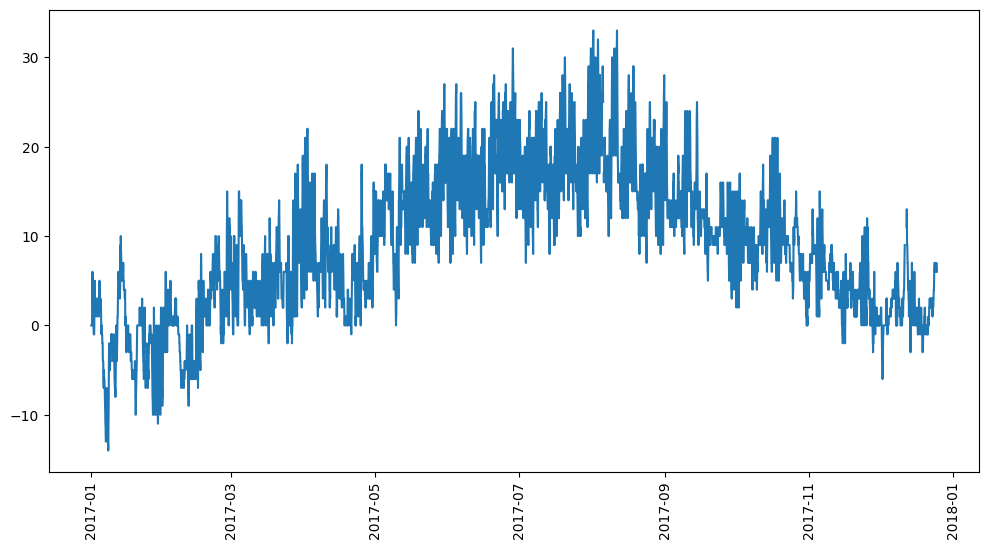

In [17]:
fig, ax = plt.subplots(figsize=(12,6))
plt.locator_params(axis='x', nbins=20)
ax.plot(df['UTC time'], df['220_temperature'])
ax.xaxis.set_tick_params(rotation=90)
#plt.plot(df['UTC time'], df['3_temperature'])
plt.show()

# może być temp. średnia, albo dla dnia (też średnia)

In [18]:
df.head()

,UTC time,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,...,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
0,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
def get_sensor_ids(data_frame):
    sensor_ids=[]
    for column in data_frame.columns:
        id = column.partition('_')[0]
        if id.isdigit():
            sensor_ids.append(id)
    ids = set(sensor_ids)
    ids = list(ids)
    # ids.sort()
    return ids

In [20]:
sensor_ids = get_sensor_ids(df)
# sensor_ids

In [21]:
# def get_columns(all_sensors_frame, sensor_list):
#     all_columns=[]
#     for sensor_id in sensor_list:
#         sensor_id = str(sensor_id)
#         sensor_columns = [column_name for column_name in all_sensors_frame.columns if column_name.startswith(sensor_id)]
#         all_columns.append(sensor_columns)
    
#     return all_columns

# all_columns = get_columns(df, sensor_ids)
# all_columns

In [22]:
def create_sensor_frame(all_sensors_frame, sensor_id):
    
    sensor_frame = all_sensors_frame.loc[:,all_sensors_frame.columns.str.startswith(sensor_id)]
    id_series = pd.Series(int(sensor_id), name='sensor_id', index=range(len(all_sensors_frame['UTC time'])))
    sensor_frame = pd.concat([id_series, all_sensors_frame['UTC time'], sensor_frame], axis=1)
    return sensor_frame

df_142 = create_sensor_frame(df, '142')
df_142

,sensor_id,UTC time,142_temperature,142_humidity,142_pressure,142_pm1,142_pm25,142_pm10
0,142,2017-01-01 00:00:00,-4.0,68.0,102279.0,115.0,127.0,196.0
1,142,2017-01-01 01:00:00,-5.0,68.0,102228.0,105.0,116.0,180.0
2,142,2017-01-01 02:00:00,-5.0,66.0,102149.0,110.0,121.0,189.0
3,142,2017-01-01 03:00:00,-5.0,66.0,102097.0,107.0,118.0,184.0
4,142,2017-01-01 04:00:00,-5.0,65.0,102047.0,112.0,123.0,193.0
...,...,...,...,...,...,...,...,...
8588,142,2017-12-24 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN
8589,142,2017-12-24 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN
8590,142,2017-12-24 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN
8591,142,2017-12-24 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
def all_sensor_frames(all_data_frame, sensor_list):
    frame_list=[]
    for sensor_id in sensor_list:
        sensor_frame = create_sensor_frame(all_data_frame, sensor_id)
        frame_list.append(sensor_frame)
    return frame_list

In [70]:
sensor_frames = all_sensor_frames(df, sensor_ids)
sensor_frames

[      sensor_id            UTC time  208_temperature  208_humidity  \
 0           208 2017-01-01 00:00:00              1.0          27.0   
 1           208 2017-01-01 01:00:00              1.0          27.0   
 2           208 2017-01-01 02:00:00              0.0          26.0   
 3           208 2017-01-01 03:00:00              1.0          25.0   
 4           208 2017-01-01 04:00:00              0.0          25.0   
 ...         ...                 ...              ...           ...   
 8588        208 2017-12-24 20:00:00              6.0          83.0   
 8589        208 2017-12-24 21:00:00              6.0          84.0   
 8590        208 2017-12-24 22:00:00              6.0          80.0   
 8591        208 2017-12-24 23:00:00              5.0          82.0   
 8592        208 2017-12-25 00:00:00              5.0          81.0   
 
       208_pressure  208_pm1  208_pm25  208_pm10  
 0         102221.0     98.0     107.0     168.0  
 1         102177.0    109.0     121.0     1

In [25]:
sensor_frames[0]

,sensor_id,UTC time,208_temperature,208_humidity,208_pressure,208_pm1,208_pm25,208_pm10
0,208,2017-01-01 00:00:00,1.0,27.0,102221.0,98.0,107.0,168.0
1,208,2017-01-01 01:00:00,1.0,27.0,102177.0,109.0,121.0,189.0
2,208,2017-01-01 02:00:00,0.0,26.0,102091.0,98.0,107.0,168.0
3,208,2017-01-01 03:00:00,1.0,25.0,102037.0,93.0,100.0,158.0
4,208,2017-01-01 04:00:00,0.0,25.0,101984.0,91.0,99.0,157.0
...,...,...,...,...,...,...,...,...
8588,208,2017-12-24 20:00:00,6.0,83.0,101726.0,20.0,21.0,37.0
8589,208,2017-12-24 21:00:00,6.0,84.0,101763.0,19.0,20.0,34.0
8590,208,2017-12-24 22:00:00,6.0,80.0,101766.0,18.0,19.0,32.0
8591,208,2017-12-24 23:00:00,5.0,82.0,101779.0,19.0,19.0,33.0


## Data analysis

### About the data

- Temperature: Celcius degrees
- Pressure: 

In [26]:
df_142.head()

,sensor_id,UTC time,142_temperature,142_humidity,142_pressure,142_pm1,142_pm25,142_pm10
0,142,2017-01-01 00:00:00,-4.0,68.0,102279.0,115.0,127.0,196.0
1,142,2017-01-01 01:00:00,-5.0,68.0,102228.0,105.0,116.0,180.0
2,142,2017-01-01 02:00:00,-5.0,66.0,102149.0,110.0,121.0,189.0
3,142,2017-01-01 03:00:00,-5.0,66.0,102097.0,107.0,118.0,184.0
4,142,2017-01-01 04:00:00,-5.0,65.0,102047.0,112.0,123.0,193.0


Converting pressure in Pascals to hectopascals

In [27]:
df_142['142_pressure'] = (df_142['142_pressure']/100)
df_142

,sensor_id,UTC time,142_temperature,142_humidity,142_pressure,142_pm1,142_pm25,142_pm10
0,142,2017-01-01 00:00:00,-4.0,68.0,1022.79,115.0,127.0,196.0
1,142,2017-01-01 01:00:00,-5.0,68.0,1022.28,105.0,116.0,180.0
2,142,2017-01-01 02:00:00,-5.0,66.0,1021.49,110.0,121.0,189.0
3,142,2017-01-01 03:00:00,-5.0,66.0,1020.97,107.0,118.0,184.0
4,142,2017-01-01 04:00:00,-5.0,65.0,1020.47,112.0,123.0,193.0
...,...,...,...,...,...,...,...,...
8588,142,2017-12-24 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN
8589,142,2017-12-24 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN
8590,142,2017-12-24 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN
8591,142,2017-12-24 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df_142.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8593 entries, 0 to 8592
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   sensor_id        8593 non-null   int64         
 1   UTC time         8593 non-null   datetime64[ns]
 2   142_temperature  2066 non-null   float64       
 3   142_humidity     2065 non-null   float64       
 4   142_pressure     2041 non-null   float64       
 5   142_pm1          1990 non-null   float64       
 6   142_pm25         1990 non-null   float64       
 7   142_pm10         1990 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 537.2 KB


In [29]:
for frame in sensor_frames:
    frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8593 entries, 0 to 8592
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   sensor_id        8593 non-null   int64         
 1   UTC time         8593 non-null   datetime64[ns]
 2   208_temperature  8043 non-null   float64       
 3   208_humidity     8042 non-null   float64       
 4   208_pressure     8018 non-null   float64       
 5   208_pm1          8042 non-null   float64       
 6   208_pm25         8043 non-null   float64       
 7   208_pm10         8043 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 537.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8593 entries, 0 to 8592
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   sensor_id        8593 non-null   int64         
 1   UTC time         8593 n

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8593 entries, 0 to 8592
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   sensor_id        8593 non-null   int64         
 1   UTC time         8593 non-null   datetime64[ns]
 2   195_temperature  7285 non-null   float64       
 3   195_humidity     7284 non-null   float64       
 4   195_pressure     7260 non-null   float64       
 5   195_pm1          7285 non-null   float64       
 6   195_pm25         7285 non-null   float64       
 7   195_pm10         7285 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 537.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8593 entries, 0 to 8592
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   sensor_id        8593 non-null   int64         
 1   UTC time         8593 n

Wiele czujników ma znacznie więcej wartości brakujących niż wartości zmierzonych. 

In [31]:
def number_of_Nans(data_frame):
    print('Liczba brakujących wartości w poszczególnych kolumnach:')
    column_names = data_frame.columns
    for column in column_names:
        print(column,': ', ((data_frame[column].isnull().sum())/len(data_frame[column])).round(2))

In [32]:
for frame in sensor_frames:
    number_of_Nans(frame)

Liczba brakujących wartości w poszczególnych kolumnach:
sensor_id :  0.0
UTC time :  0.0
208_temperature :  0.06
208_humidity :  0.06
208_pressure :  0.07
208_pm1 :  0.06
208_pm25 :  0.06
208_pm10 :  0.06
Liczba brakujących wartości w poszczególnych kolumnach:
sensor_id :  0.0
UTC time :  0.0
227_temperature :  0.66
227_humidity :  0.66
227_pressure :  0.51
227_pm1 :  0.51
227_pm25 :  0.51
227_pm10 :  0.51
Liczba brakujących wartości w poszczególnych kolumnach:
sensor_id :  0.0
UTC time :  0.0
220_temperature :  0.0
220_humidity :  0.0
220_pressure :  0.01
220_pm1 :  0.0
220_pm25 :  0.0
220_pm10 :  0.0
Liczba brakujących wartości w poszczególnych kolumnach:
sensor_id :  0.0
UTC time :  0.0
172_temperature :  0.81
172_humidity :  0.81
172_pressure :  0.03
172_pm1 :  0.02
172_pm25 :  0.02
172_pm10 :  0.02
Liczba brakujących wartości w poszczególnych kolumnach:
sensor_id :  0.0
UTC time :  0.0
177_temperature :  0.1
177_humidity :  0.1
177_pressure :  0.35
177_pm1 :  0.1
177_pm25 :  0.1
1

Tworzymy funkcję, która działa na pojedyńczej ramce danych (jednego czujnika)

In [46]:
def high_nans_ratio(data_frame):
    #print('Liczba brakujących wartości w poszczególnych kolumnach:')
    column_names = data_frame.columns
    for column in column_names:
        nan_ratio = ((data_frame[column].isnull().sum())/len(data_frame[column])).round(2)
        if nan_ratio > 0.5:
            print(column,': ', nan_ratio)

Tworzymy funkcję, która uruchamia funkcję działającą na pojedyńczej ramce danych, na wszystkie ramki danych na liście. 

In [34]:
def apply_function(list_of_frames, function):
    for frame in list_of_frames:
        function(frame)

In [47]:
apply_function(sensor_frames, high_nans_ratio)

227_temperature :  0.66
227_humidity :  0.66
227_pressure :  0.51
227_pm1 :  0.51
227_pm25 :  0.51
227_pm10 :  0.51
172_temperature :  0.81
172_humidity :  0.81
196_pressure :  0.8
213_temperature :  0.54
213_humidity :  0.54
213_pressure :  0.53
213_pm1 :  0.53
213_pm25 :  0.53
213_pm10 :  0.53
180_pressure :  0.8
3_temperature :  0.98
3_humidity :  0.98
3_pressure :  0.86
3_pm1 :  0.86
3_pm25 :  0.86
3_pm10 :  0.86
201_pressure :  0.8
142_temperature :  0.76
142_humidity :  0.76
142_pressure :  0.76
142_pm1 :  0.77
142_pm25 :  0.77
142_pm10 :  0.77
179_pressure :  0.82
857_temperature :  0.69
857_humidity :  0.69
857_pressure :  0.69
857_pm1 :  0.69
857_pm25 :  0.69
857_pm10 :  0.69
211_temperature :  0.83
211_humidity :  0.83
211_pressure :  0.83
211_pm1 :  0.83
211_pm25 :  0.83
211_pm10 :  0.83
808_temperature :  0.87
808_humidity :  0.87
808_pressure :  0.87
808_pm1 :  0.87
808_pm25 :  0.87
808_pm10 :  0.87
147_temperature :  0.73
147_humidity :  0.73
184_pressure :  0.8
713_tempe

Odrzucamy te czujniki, gdzie braki w danych we wszystkich kolumnach przekraczają 50 %.

In [62]:
def high_nans_removal(data_frame_list):
    dropped_frames_miss_6 = []
    new_data_frame_list = []
    for k, frame in enumerate(data_frame_list):
        n_missing_cols = (frame.isna().sum() / len(frame) > 0.45).sum()
        
        if n_missing_cols == 6:
            dropped_frames_miss_6.append(frame)
        else:
            new_data_frame_list.append(frame)
            
    return new_data_frame_list, dropped_frames_miss_6

In [71]:
new_sensor_frames, dropped_frames = high_nans_removal(sensor_frames)

In [72]:
apply_function(new_sensor_frames, high_nans_ratio)

172_temperature :  0.81
172_humidity :  0.81
196_pressure :  0.8
180_pressure :  0.8
201_pressure :  0.8
179_pressure :  0.82
147_temperature :  0.73
147_humidity :  0.73
184_pressure :  0.8
182_pressure :  0.8
176_pressure :  0.8
183_pressure :  0.89
181_pressure :  0.8
203_pressure :  1.0
185_pressure :  0.83


In [73]:
apply_function(dropped_frames, high_nans_ratio)

227_temperature :  0.66
227_humidity :  0.66
227_pressure :  0.51
227_pm1 :  0.51
227_pm25 :  0.51
227_pm10 :  0.51
213_temperature :  0.54
213_humidity :  0.54
213_pressure :  0.53
213_pm1 :  0.53
213_pm25 :  0.53
213_pm10 :  0.53
3_temperature :  0.98
3_humidity :  0.98
3_pressure :  0.86
3_pm1 :  0.86
3_pm25 :  0.86
3_pm10 :  0.86
142_temperature :  0.76
142_humidity :  0.76
142_pressure :  0.76
142_pm1 :  0.77
142_pm25 :  0.77
142_pm10 :  0.77
857_temperature :  0.69
857_humidity :  0.69
857_pressure :  0.69
857_pm1 :  0.69
857_pm25 :  0.69
857_pm10 :  0.69
211_temperature :  0.83
211_humidity :  0.83
211_pressure :  0.83
211_pm1 :  0.83
211_pm25 :  0.83
211_pm10 :  0.83
808_temperature :  0.87
808_humidity :  0.87
808_pressure :  0.87
808_pm1 :  0.87
808_pm25 :  0.87
808_pm10 :  0.87
713_temperature :  0.68
713_humidity :  0.68
713_pressure :  0.65
713_pm1 :  0.65
713_pm25 :  0.65
713_pm10 :  0.65
178_temperature :  0.77
178_humidity :  0.77
178_pressure :  1.0
178_pm1 :  0.77
178

In [69]:
apply_function(sensor_frames, high_nans_ratio)

172_temperature :  0.81
172_humidity :  0.81
196_pressure :  0.8
180_pressure :  0.8
201_pressure :  0.8
179_pressure :  0.82
147_temperature :  0.73
147_humidity :  0.73
184_pressure :  0.8
182_pressure :  0.8
176_pressure :  0.8
183_pressure :  0.89
181_pressure :  0.8
203_pressure :  1.0
185_pressure :  0.83


In [106]:
def display_frame(search_id, list_of_frames):
    for i, k in enumerate(list_of_frames):
        if list_of_frames[i]['sensor_id'][i] == search_id:
            print (list_of_frames[i]['sensor_id'][i]," : ", i)
            #display(list_of_frames[i])

In [ ]:
# Słownik zamiast listy- usprawnienie. 

**Czujnik nr 172 ma powyżej 80 % braków w pomiarze temperatury i wilgotności. Najbliżej niego znajduje się czujnik nr 170, który posiada większość kompletnych danych. Ze względu na przewidywaną niewielką różnicę pomiędzy rzeczywistymi wartościami temperatury i wilgotności kopiujemy dane z czujnika 170 do czujnika 172.** 

In [78]:
new_sensor_frames[12].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8593 entries, 0 to 8592
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   sensor_id        8593 non-null   int64         
 1   UTC time         8593 non-null   datetime64[ns]
 2   170_temperature  8460 non-null   float64       
 3   170_humidity     8459 non-null   float64       
 4   170_pressure     8435 non-null   float64       
 5   170_pm1          8460 non-null   float64       
 6   170_pm25         8460 non-null   float64       
 7   170_pm10         8460 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 537.2 KB


In [79]:
new_sensor_frames[2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8593 entries, 0 to 8592
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   sensor_id        8593 non-null   int64         
 1   UTC time         8593 non-null   datetime64[ns]
 2   172_temperature  1596 non-null   float64       
 3   172_humidity     1596 non-null   float64       
 4   172_pressure     8363 non-null   float64       
 5   172_pm1          8388 non-null   float64       
 6   172_pm25         8388 non-null   float64       
 7   172_pm10         8388 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 537.2 KB


In [82]:
new_sensor_frames[2]['172_temperature'].isna().sum()

6997

In [84]:
new_sensor_frames[2]['172_temperature'] = new_sensor_frames[12]['170_temperature']

In [86]:
new_sensor_frames[2]['172_humidity'] = new_sensor_frames[12]['170_humidity']

**Analogiczne podejście stosujemy w przypadku braków temperatury, wilgotności i ciśnienia w innych czujnikach.**

**Przy wyborze czujników zwracamy też uwagę na otoczenie.**

 

In [93]:
new_sensor_frames[4]['196_pressure'] = new_sensor_frames[35]['214_pressure']

In [94]:
new_sensor_frames[4]['196_pressure'].isna().sum()

67

In [98]:
new_sensor_frames[7]['180_pressure'] = new_sensor_frames[42]['223_pressure']

In [99]:
new_sensor_frames[7]['180_pressure'].isna().sum()

116

In [116]:
new_sensor_frames[8]['201_pressure'] = new_sensor_frames[4]['196_pressure']

In [117]:
new_sensor_frames[8]['201_pressure'].isna().sum()

67

In [120]:
new_sensor_frames[10]['179_pressure'] = new_sensor_frames[1]['220_pressure']

In [121]:
new_sensor_frames[10]['179_pressure'].isna().sum()

57

In [129]:
new_sensor_frames[15]['147_temperature'] = new_sensor_frames[19]['189_temperature']
new_sensor_frames[15]['147_humidity'] = new_sensor_frames[19]['189_humidity']

In [130]:
new_sensor_frames[15]['147_temperature'].isna().sum(), new_sensor_frames[15]['147_humidity'].isna().sum()

(131, 133)

In [140]:
new_sensor_frames[16]['184_pressure'] = new_sensor_frames[14]['173_pressure']

In [141]:
new_sensor_frames[16]['184_pressure'].isna().sum()

119

In [145]:
new_sensor_frames[20]['182_pressure'] = new_sensor_frames[7]['180_pressure']

In [146]:
new_sensor_frames[20]['182_pressure'].isna().sum()

116

In [151]:
new_sensor_frames[22]['176_pressure'] = new_sensor_frames[15]['147_pressure']

In [152]:
new_sensor_frames[15]['147_pressure'].isna().sum()

653

In [160]:
new_sensor_frames[24]['183_pressure'] = new_sensor_frames[9]['209_pressure']

In [161]:
new_sensor_frames[24]['183_pressure'].isna().sum()

792

In [162]:
display_frame(181, new_sensor_frames)

181  :  27


In [163]:
display_frame(204, new_sensor_frames)

204  :  44


In [165]:
new_sensor_frames[27]['181_pressure'] = new_sensor_frames[44]['204_pressure']

In [166]:
new_sensor_frames[27]['181_pressure'].isna().sum()

77

In [167]:
display_frame(203, new_sensor_frames)

203  :  30


In [168]:
display_frame(194, new_sensor_frames)

194  :  21


In [170]:
new_sensor_frames[30]['203_pressure'] = new_sensor_frames[21]['194_pressure']

In [171]:
new_sensor_frames[27]['181_pressure'].isna().sum()

77

In [177]:
new_sensor_frames[34]['185_pressure'] = new_sensor_frames[17]['192_pressure']

In [178]:
new_sensor_frames[34]['185_pressure'].isna().sum()

234

In [179]:
def nans_ratio(data_frame):
    column_names = data_frame.columns
    for column in column_names:
        nan_ratio = ((data_frame[column].isnull().sum())/len(data_frame[column])).round(2)
        print(column,': ', nan_ratio)

In [181]:
apply_function(new_sensor_frames, nans_ratio)

sensor_id :  0.0
UTC time :  0.0
208_temperature :  0.06
208_humidity :  0.06
208_pressure :  0.07
208_pm1 :  0.06
208_pm25 :  0.06
208_pm10 :  0.06
sensor_id :  0.0
UTC time :  0.0
220_temperature :  0.0
220_humidity :  0.0
220_pressure :  0.01
220_pm1 :  0.0
220_pm25 :  0.0
220_pm10 :  0.0
sensor_id :  0.0
UTC time :  0.0
172_temperature :  0.02
172_humidity :  0.02
172_pressure :  0.03
172_pm1 :  0.02
172_pm25 :  0.02
172_pm10 :  0.02
sensor_id :  0.0
UTC time :  0.0
177_temperature :  0.1
177_humidity :  0.1
177_pressure :  0.35
177_pm1 :  0.1
177_pm25 :  0.1
177_pm10 :  0.1
sensor_id :  0.0
UTC time :  0.0
196_temperature :  0.01
196_humidity :  0.01
196_pressure :  0.01
196_pm1 :  0.01
196_pm25 :  0.01
196_pm10 :  0.01
sensor_id :  0.0
UTC time :  0.0
202_temperature :  0.04
202_humidity :  0.04
202_pressure :  0.04
202_pm1 :  0.04
202_pm25 :  0.04
202_pm10 :  0.04
sensor_id :  0.0
UTC time :  0.0
218_temperature :  0.0
218_humidity :  0.01
218_pressure :  0.01
218_pm1 :  0.01
21

In [182]:
def nans_ratio_above_10proc(data_frame):
    #print('Liczba brakujących wartości w poszczególnych kolumnach:')
    column_names = data_frame.columns
    for column in column_names:
        nan_ratio = ((data_frame[column].isnull().sum())/len(data_frame[column])).round(2)
        if nan_ratio > 0.1:
            print(column,': ', nan_ratio)

In [192]:
apply_function(new_sensor_frames, nans_ratio_above_10proc)

177_pressure :  0.35
174_temperature :  0.14
174_humidity :  0.14
174_pressure :  0.14
174_pm1 :  0.14
174_pm25 :  0.14
174_pm10 :  0.14
182_temperature :  0.12
182_humidity :  0.12
182_pm1 :  0.12
182_pm25 :  0.12
182_pm10 :  0.12
622_temperature :  0.38
622_humidity :  0.38
622_pressure :  0.35
622_pm1 :  0.35
622_pm25 :  0.35
622_pm10 :  0.35
203_temperature :  0.18
203_humidity :  0.18
203_pm1 :  0.18
203_pm25 :  0.18
203_pm10 :  0.18
895_temperature :  0.37
895_humidity :  0.37
895_pressure :  0.26
895_pm1 :  0.26
895_pm25 :  0.26
895_pm10 :  0.26
195_temperature :  0.15
195_humidity :  0.15
195_pressure :  0.16
195_pm1 :  0.15
195_pm25 :  0.15
195_pm10 :  0.15
140_temperature :  0.24
140_humidity :  0.24
140_pressure :  0.22
140_pm1 :  0.23
140_pm25 :  0.23
140_pm10 :  0.23


In [185]:
display_frame(216, new_sensor_frames)

216  :  32


Sensor nr 216 posiada braki prawie 50 % (47-48 %). Jego również usuwamy z analizy. 

In [187]:
dropped_sensors.append(new_sensor_frames.pop(32))

In [190]:
display_frame(216, new_sensor_frames)

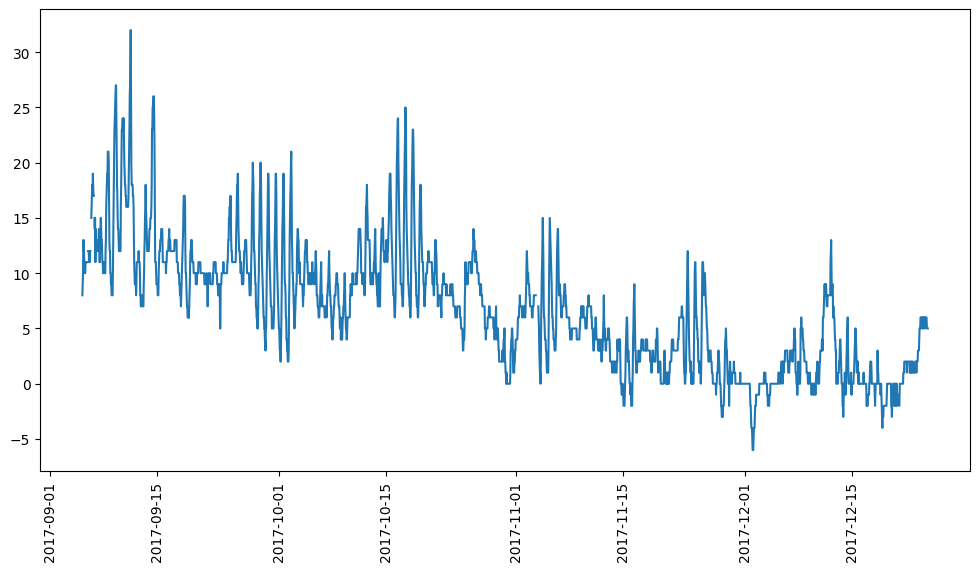

In [45]:
fig, ax = plt.subplots(figsize=(12,6))
plt.locator_params(axis='x', nbins=20)
ax.plot(sensor_frames[15]['UTC time'], sensor_frames[15]['857_temperature'])
ax.xaxis.set_tick_params(rotation=90)
plt.show()

Czujnik 857 uruchomiony we wrześniu. Dalej ciągłość zapisów. Co w tej sytuacji? 

### Odległości między punktami i wysokość npm 

odległości między punktami- gotowe biblioteki. 

import geopy.distance

coords_1 = (52.2296756, 21.0122287)
coords_2 = (52.406374, 16.9251681)

print geopy.distance.geodesic(coords_1, coords_2).km

import mpu

Point one
lat1 = 52.2296756
lon1 = 21.0122287

Point two
lat2 = 52.406374
lon2 = 16.9251681

What you were looking for
dist = mpu.haversine_distance((lat1, lon1), (lat2, lon2))
print(dist)  # gives 278.45817507541943.

https://wrf-python.readthedocs.io/en/latest/internal_api/generated/wrf.g_geoht.get_height.html

In [ ]:
tutaj spróbować:
https://gis.stackexchange.com/questions/338392/getting-elevation-for-multiple-lat-long-coordinates-in-python

import rasterio

coords = ((147.363,-36.419), (147.361,-36.430))
elevation = 'srtm_66_20.tif'

with rasterio.open(elevation) as src:
    vals = src.sample(coords)
    for val in vals:
        print(val[0]) #val is an array of values, 1 element 
                      #per band. src is a single band raster 
                      #so we only need val[0]

Do tworzenia wysokości: 

import requests
import urllib
import pandas as pd
 
USGS Elevation Point Query Service
url = r'https://nationalmap.gov/epqs/pqs.php?'
 
coordinates with known elevation 
lat = [48.633, 48.733, 45.1947, 45.1962]
lon = [-93.9667, -94.6167, -93.3257, -93.2755]
 
create data frame
df = pd.DataFrame({
    'lat': lat,
    'lon': lon
})
 
def elevation_function(df, lat_column, lon_column):
    """Query service using lat, lon. add the elevation values as a new column."""
    elevations = []
    for lat, lon in zip(df[lat_column], df[lon_column]):
 
        # define rest query params
        params = {
            'output': 'json',
            'x': lon,
            'y': lat,
            'units': 'Meters'
        }
 
        # format query string and return query value
        result = requests.get((url + urllib.parse.urlencode(params)))
        elevations.append(result.json()['USGS_Elevation_Point_Query_Service']['Elevation_Query']['Elevation'])
 
    df['elev_meters'] = elevations

`elevation_function(df, 'lat', 'lon')`